In [1]:
import ramanchada2 as rc2
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pyambit.datamodel as mx
from pyambit.nexus_spectra import spe2ambit
import nexusformat.nexus.tree as nx
import uuid

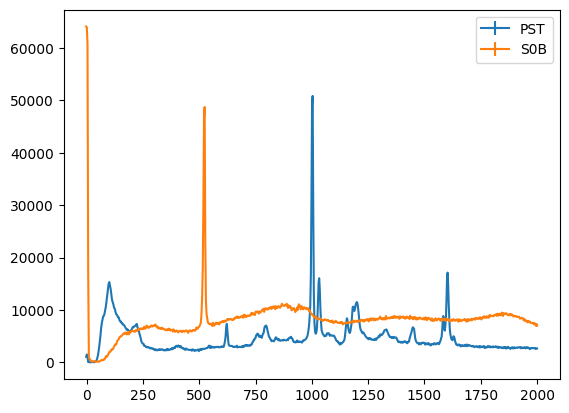

In [2]:
sample_pst = "PST"
provider = "ICV"
instrument_vendor = "BWtek"
laser_wl = 532
kwargs = {"sample":[sample_pst], "provider" : [provider], "device" : [instrument_vendor], "OP":['050'], "laser_wl":[str(laser_wl)]}
spe_pst = rc2.spectrum.from_test_spe(**kwargs)

sample_sil = "S0B"
kwargs = {"sample":[sample_sil], "provider" : [provider], "device" : [instrument_vendor], "OP":['050'], "laser_wl":[str(laser_wl)]}
spe_sil = rc2.spectrum.from_test_spe(**kwargs)

ax = spe_pst.plot(label=sample_pst)
ax = spe_sil.plot(label=sample_sil, ax =ax)

# spe_pst.meta,spe_sil.meta

In [3]:

prefix = "TEST"

substances = []
for (sample,spe) in zip([sample_pst,sample_sil],[spe_pst,spe_sil]):
    substance = mx.SubstanceRecord(name=sample, publicname=sample, ownerName="TEST")
    substance.i5uuid = "{}-{}".format(prefix, uuid.uuid5(uuid.NAMESPACE_OID, sample))
    protocol_application = spe2ambit(
        x=spe.x,
        y=spe.y,
        meta=spe.meta.dict(), 
        instrument=(instrument_vendor,"model"),
        wavelength=laser_wl,
        provider=provider,
        investigation="My experiment",
        sample=sample,
        sample_provider="CHARISMA",
        prefix=prefix,
        endpointtype="RAW_DATA",
        unit="cm-1",
    )
    substance.study = [protocol_application]
    substances.append(substance)

substances = mx.Substances(substance=substances)
file = "spectra_demo.nxs"
nxroot = nx.NXroot()
nxroot.attrs["pyambit"] = "0.0.1"
nxroot.attrs["file_name"] = os.path.basename(file)
substances.to_nexus(nxroot)

print(file)
print(nxroot.tree)
nxroot.save(file, mode="w")

spectra_demo.nxs
root:NXroot
  @file_name = 'spectra_demo.nxs'
  @pyambit = '0.0.1'
  ICV_TEST-2380eb4a-056a-57cd-8e1b-80fcc13b41b0:NXentry
    @default = 'RAW_DATA'
    @name = '/ICV_TEST-2380eb4a-056a-57cd-8e1b-80fcc13b41b0'
    RAW_DATA:NXgroup
      S0B_1:NXdata
        @axes = 'RamanShift'
        @interpretation = 'spectrum'
        @signal = 'DarkSubtracted'
        DarkSubtracted = float64(762)
          @long_name = 'DarkSubtracted count'
          @units = 'count'
        RamanShift = float64(762)
          @errors = ''
          @long_name = 'RamanShift cm-1'
          @units = 'cm-1'
        title = 'S0B'
    collection_identifier = '4666f407-68a9-5e0f-8152-71d6449aa1ab'
    definition = 'NXraman'
    entry_identifier_uuid = 'TEST-2380eb4a-056a-57cd-8e1b-80fcc13b41b0'
    experiment_documentation:NXnote
      E.method = 'Raman spectroscopy'
      date = None
      protocol:NXcollection
        @code = 'ANALYTICAL_METHODS_SECTION'
        @topcategory = 'P-CHEM'
    experime

NXroot('spectra_demo')